In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
X = boston.data

In [4]:
y = boston.target

In [5]:
Xfull = pd.DataFrame(X)

In [6]:
Xfull

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
Xfull.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [8]:
# 人为制造缺失值

In [9]:
missing_p = 0.5
total_num = Xfull.shape[0] * Xfull.shape[1]

In [10]:
n_missing_samples = int(np.floor(total_num * missing_p))

In [11]:
n_missing_samples

3289

In [12]:
rng = np.random.RandomState(0)

In [13]:
missing_feature = rng.randint(0,Xfull.shape[0],n_missing_samples)
missing_samples = rng.randint(0,Xfull.shape[1],n_missing_samples)

In [14]:
X_missing = X.copy()
y_missing = y.copy()

In [15]:
X_missing[missing_feature,missing_samples] = np.nan

In [16]:
X_missing = pd.DataFrame(X_missing)

In [17]:
X_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,2.31,0.0,NaN,6.575,65.2,4.0900,1.0,NaN,NaN,NaN,NaN
1,0.02731,0.0,NaN,0.0,0.469,6.421,NaN,4.9671,2.0,242.0,17.8,NaN,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,NaN,4.9671,NaN,242.0,NaN,392.83,4.03
3,0.03237,0.0,NaN,NaN,0.458,NaN,NaN,NaN,NaN,222.0,18.7,394.63,NaN
4,NaN,0.0,2.18,0.0,0.458,NaN,54.2,NaN,3.0,NaN,18.7,396.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,NaN,11.93,NaN,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,NaN,2.2875,NaN,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,NaN,NaN,NaN,NaN,2.1675,1.0,273.0,21.0,396.90,5.64
504,NaN,NaN,NaN,NaN,NaN,6.794,NaN,NaN,1.0,NaN,21.0,NaN,6.48


In [18]:
from sklearn.impute import SimpleImputer

In [19]:
# 用均值填充缺失值

In [20]:
X_missing_mean = SimpleImputer(missing_values=np.nan,strategy='mean').fit_transform(X_missing)

In [21]:
# 用0填充缺失值

In [22]:
X_missing_0 = SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0).fit_transform(X_missing)

### 使用随机森林回归

In [23]:
"""
任何回归都是从特征矩阵中学习，然后求解连续型标签y的过程，之所以能够实现这个过程，
是因为回归算法认为，特征 矩阵和标签之前存在着某种联系。实际上，标签和特征是可以相互转换的，
比如说，在一个“用地区，环境，附近学校数 量”预测“房价”的问题中，
我们既可以用“地区”，“环境”，“附近学校数量”的数据来预测“房价”，
也可以反过来， 用“环境”，“附近学校数量”和“房价”来预测“地区”。而回归填补缺失值，正是利用了这种思想。

对于一个有n个特征的数据来说，其中特征T有缺失值，我们就把特征T当作标签，其他的n-1个特征和原本的标签组成新 的特征矩阵。
那对于T来说，它没有缺失的部分，就是我们的Y_trian，这部分数据既有标签也有特征，而它缺失的部分，只有特征没有标签，就是我们需要预测的部分。


特征T不缺失的值对应的其他n-1个特征 + 本来的标签:X_train 特征T不缺失的值:Y_train

特征T缺失的值对应的其他n-1个特征 + 本来的标签:X_test 特征T缺失的值:未知，我们需要预测的Y_test

这种做法，对于某一个特征大量缺失，其他特征却很完整的情况，非常适用。
那如果数据中除了特征T之外，其他特征也有缺失值怎么办? 
答案是遍历所有的特征，从缺失最少的开始进行填补(因为填补缺失最少的特征所需要的准确信息最少)。 
填补一个特征时，先将其他特征的缺失值用0代替，每完成一次回归预测，就将预测值放到原本的特征矩阵中，再继续填 补下一个特征。
每一次填补完毕，有缺失值的特征会减少一个，所以每次循环后，需要用0来填补的特征就越来越少。
当进行到最后一个特征时(这个特征应该是所有特征中缺失值最多的)，
已经没有任何的其他特征需要用0来进行填补了， 而我们已经使用回归为其他特征填补了大量有效信息，可以用来填补缺失最多的特征。
遍历所有的特征后，数据就完整，不再有缺失值了。

"""

'\n任何回归都是从特征矩阵中学习，然后求解连续型标签y的过程，之所以能够实现这个过程，\n是因为回归算法认为，特征 矩阵和标签之前存在着某种联系。实际上，标签和特征是可以相互转换的，\n比如说，在一个“用地区，环境，附近学校数 量”预测“房价”的问题中，\n我们既可以用“地区”，“环境”，“附近学校数量”的数据来预测“房价”，\n也可以反过来， 用“环境”，“附近学校数量”和“房价”来预测“地区”。而回归填补缺失值，正是利用了这种思想。\n\n对于一个有n个特征的数据来说，其中特征T有缺失值，我们就把特征T当作标签，其他的n-1个特征和原本的标签组成新 的特征矩阵。\n那对于T来说，它没有缺失的部分，就是我们的Y_trian，这部分数据既有标签也有特征，而它缺失的部分，只有特征没有标签，就是我们需要预测的部分。\n\n\n特征T不缺失的值对应的其他n-1个特征 + 本来的标签:X_train 特征T不缺失的值:Y_train\n\n特征T缺失的值对应的其他n-1个特征 + 本来的标签:X_test 特征T缺失的值:未知，我们需要预测的Y_test\n\n这种做法，对于某一个特征大量缺失，其他特征却很完整的情况，非常适用。\n那如果数据中除了特征T之外，其他特征也有缺失值怎么办? \n答案是遍历所有的特征，从缺失最少的开始进行填补(因为填补缺失最少的特征所需要的准确信息最少)。 \n填补一个特征时，先将其他特征的缺失值用0代替，每完成一次回归预测，就将预测值放到原本的特征矩阵中，再继续填 补下一个特征。\n每一次填补完毕，有缺失值的特征会减少一个，所以每次循环后，需要用0来填补的特征就越来越少。\n当进行到最后一个特征时(这个特征应该是所有特征中缺失值最多的)，\n已经没有任何的其他特征需要用0来进行填补了， 而我们已经使用回归为其他特征填补了大量有效信息，可以用来填补缺失最多的特征。\n遍历所有的特征后，数据就完整，不再有缺失值了。\n\n'

In [24]:
X_missing_reg = X_missing.copy()
#找缺省值排序的索引
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values

In [25]:
sortindex

array([ 7,  2,  1,  3,  8,  0,  9,  4, 12,  5, 10, 11,  6])

In [26]:
from sklearn.ensemble import RandomForestRegressor
for i in sortindex:
    df = X_missing_reg.copy()
    # 需要填补的那一列
    fillc = df.iloc[:,i]
    # 把剩下的 和 原本的label 合起来 组成
    
    df = pd.concat([df.iloc[:,df.columns != df.columns[i]],pd.DataFrame(y)],axis=1)
    
    #对新的特征矩阵 填补0
    df_0 =SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)
    
    Ytrain = fillc[fillc.notnull()] 
    Xtrain = df_0[Ytrain.index,:] 
    
    Ytest = fillc[fillc.isnull()]
    Xtest = df_0[Ytest.index,:]
    
    
    rfc = RandomForestRegressor(n_estimators=100) 
    rfc = rfc.fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest)
    X_missing_reg.iloc[X_missing_reg.iloc[:,i].isnull().values,i] = Ypredict

In [27]:
X_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.133734,7.220,2.3100,0.00,0.462966,6.57500,65.200,4.090000,1.00,238.14,18.657,391.4549,7.9601
1,0.027310,0.000,6.3493,0.00,0.469000,6.42100,44.403,4.967100,2.00,242.00,17.800,390.9184,9.1400
2,0.027290,28.275,7.0700,0.00,0.437655,7.18500,27.893,4.967100,4.59,242.00,16.119,392.8300,4.0300
3,0.032370,0.000,4.1915,0.01,0.458000,7.11421,48.448,4.398992,3.96,222.00,18.700,394.6300,4.9815
4,0.050712,0.000,2.1800,0.00,0.458000,7.07059,54.200,4.754735,3.00,215.61,18.700,396.9000,5.8896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.062630,0.000,11.9300,0.15,0.573000,6.59300,69.100,2.478600,1.00,273.00,21.000,391.9900,9.6700
502,0.045270,0.000,11.9300,0.00,0.573000,6.12000,79.919,2.287500,4.18,273.00,21.000,396.9000,9.0800
503,0.060760,0.000,11.9300,0.02,0.576330,6.67689,77.569,2.167500,1.00,273.00,21.000,396.9000,5.6400
504,0.060748,14.970,4.3977,0.12,0.450877,6.79400,38.471,5.840833,1.00,283.08,21.000,388.6409,6.4800


In [35]:
from sklearn.model_selection import cross_val_score
X = [Xfull,X_missing_mean,X_missing_0,X_missing_reg]
mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    scores = cross_val_score(estimator,x,y,scoring='neg_mean_squared_error', cv=5).mean()
    mse.append(scores * -1)

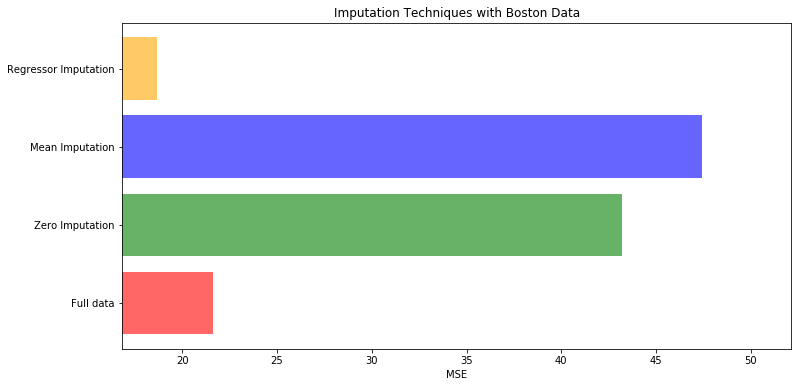

In [40]:
x_labels = ['Full data',
            'Zero Imputation',
            'Mean Imputation',
            'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(12, 6)) 
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center') 
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE') 
ax.set_yticklabels(x_labels) 
plt.show()
rfc = RandomForestRegressor(n_estimators=100) 
rfc = rfc.fit(Xtrain, Ytrain)
Ypredict = rfc.predict(Xtest)


In [28]:
[*X_missing_reg.columns]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [29]:
df1=pd.DataFrame({'A':[1,2,3],'B':[4,5,6],'C':[7,8,9]})
print(df1)

   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9


In [30]:
df1.columns != 'A'

array([False,  True,  True])